In [1]:
import numpy as np
from cosmoTransitions import generic_potential_1
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize,stats
import scipy.integrate as integrate
import random
import seaborn as sns
from scipy import interpolate, special

plt.rcParams["figure.figsize"] = (8, 6)  #set default figure size
pd.set_option('display.max_rows', None)
thick_size=16
label_size=20

####Some definitions##
v2 = 246.2**2
mh=125.09
v=246.2
alpha=1/137
sinthw=np.sqrt(0.223)
g1=np.sqrt(4*np.pi*alpha/(1-sinthw**2)) ##U(1)_Y gauge coupling (also the electron charge in dimensionless units)
g=np.sqrt(4*np.pi*alpha)/sinthw
Mplanck=2.4*10**18
cs=1/3**0.5 ##Sound speed constant
del alpha


####This code uses an interpoaltion function for the number of degrees of freedom as function of temperature
###Data is obtained from https://member.ipmu.jp/satoshi.shirai/EOS2018
data = np.loadtxt( 'satoshi_dof.dat' )
Temperature_d=(data.T)[0][900:3900]
dof_d=(data.T)[1][900:3900]
#f = interpolate.interp1d(Temperature_d, dof_d)###"""the function works from T=[10e-4,1000]"""
g_star = interpolate.interp1d(Temperature_d, dof_d, kind='cubic')




In [372]:
df12=pd.read_csv("SCANS/scan_cluster_0/On_Shell_12.csv",index_col=[0])
df13=pd.read_csv("SCANS/scan_cluster_0/On_Shell_13.csv",index_col=[0])
df14=pd.read_csv("SCANS/scan_cluster_0/On_Shell_14.csv",index_col=[0])
df15=pd.read_csv("SCANS/scan_cluster_0/On_Shell_15.csv",index_col=[0])
df16=pd.read_csv("SCANS/scan_cluster_0/On_Shell_16.csv",index_col=[0])
df17=pd.read_csv("SCANS/scan_cluster_0/On_Shell_17.csv",index_col=[0])
df18=pd.read_csv("SCANS/scan_cluster_0/On_Shell_18.csv",index_col=[0])
df19=pd.read_csv("SCANS/scan_cluster_0/On_Shell_19.csv",index_col=[0])
df20=pd.read_csv("SCANS/scan_cluster_0/On_Shell_20.csv",index_col=[0])
df21=pd.read_csv("SCANS/scan_cluster_0/On_Shell_21.csv",index_col=[0])
df22=pd.read_csv("SCANS/scan_cluster_0/On_Shell_22.csv",index_col=[0])
df23=pd.read_csv("SCANS/scan_cluster_0/On_Shell_23.csv",index_col=[0])
df24=pd.read_csv("SCANS/scan_cluster_0/On_Shell_24.csv",index_col=[0])
df25=pd.read_csv("SCANS/scan_cluster_0/On_Shell_25.csv",index_col=[0])
df26=pd.read_csv("SCANS/scan_cluster_0/On_Shell_26.csv",index_col=[0])
df27=pd.read_csv("SCANS/scan_cluster_0/On_Shell_27.csv",index_col=[0])
df28=pd.read_csv("SCANS/scan_cluster_0/On_Shell_28.csv",index_col=[0])
df29=pd.read_csv("SCANS/scan_cluster_0/On_Shell_29.csv",index_col=[0])
df30=pd.read_csv("SCANS/scan_cluster_0/On_Shell_30.csv",index_col=[0])
df31=pd.read_csv("SCANS/scan_cluster_0/On_Shell_31.csv",index_col=[0])
df32=pd.read_csv("SCANS/scan_cluster_0/On_Shell_32.csv",index_col=[0])
df33=pd.read_csv("SCANS/scan_cluster_0/On_Shell_33.csv",index_col=[0])
df34=pd.read_csv("SCANS/scan_cluster_0/On_Shell_34.csv",index_col=[0])
df35=pd.read_csv("SCANS/scan_cluster_0/On_Shell_35.csv",index_col=[0])
df36=pd.read_csv("SCANS/scan_cluster_0/On_Shell_36.csv",index_col=[0])
df37=pd.read_csv("SCANS/scan_cluster_0/On_Shell_37.csv",index_col=[0])
df38=pd.read_csv("SCANS/scan_cluster_0/On_Shell_38.csv",index_col=[0])
df39=pd.read_csv("SCANS/scan_cluster_0/On_Shell_39.csv",index_col=[0])
df40=pd.read_csv("SCANS/scan_cluster_0/On_Shell_40.csv",index_col=[0])
df41=pd.read_csv("SCANS/scan_cluster_0/On_Shell_41.csv",index_col=[0])
df42=pd.read_csv("SCANS/scan_cluster_0/On_Shell_42.csv",index_col=[0])
df43=pd.read_csv("SCANS/scan_cluster_0/On_Shell_43.csv",index_col=[0])


df_total=pd.concat([df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,
           df26,df27,df28,df29,df30,df31,df32,df33,df34,df35,df36,df37,df38,df39,
           df40,df41,df42,df43])

df_total=df_total[df_total.alpha_max>1e-1]
df_total=df_total[df_total.alpha_max<1e-0]
df_total=df_total[df_total.num_FOPT>=1]
#df_total=df_total[df_total.lams>.5]
#df_total=df_total[df_total.lams<1]
#df_total=df_total[df_total.lamh>.75]
#df_total=df_total[df_total.lamh<.8]

df=df_total
len(df)

24

In [373]:
dphi0=((df['h_low_0']-df['h_high_0'])**2+1*(df['s_low_0']-df['s_high_0'])**2)**.5
dphi1=((df['h_low_1']-df['h_high_1'])**2+1*(df['s_low_1']-df['s_high_1'])**2)**.5
dphi2=((df['h_low_2']-df['h_high_2'])**2+1*(df['s_low_2']-df['s_high_2'])**2)**.5
df["dphi0"]=dphi0
df["dphi1"]=dphi1
df["dphi2"]=dphi2
dphi_max=df[["dphi0","dphi1","dphi2"]].apply(max,axis=1)
df["dphi_max"]=dphi_max

In [374]:
df.columns


Index(['ms', 'theta', 'u', 'muhs', 'mu3', 'lamh', 'lams', 'lammix', 'muh2',
       'mus2', 'Pih', 'Pis', 'lamh_tilde', 'th_bool', 'h_low_0', 's_low_0',
       'h_high_0', 's_high_0', 'Tnuc_0', 'dT_0', 'alpha_0', 'vwf_0', 'xi_J_0',
       'v_calculable_0', 'num_FOPT', 'alpha_max', 'dT_max', 'tran_type',
       'h_low_1', 's_low_1', 'h_high_1', 's_high_1', 'Tnuc_1', 'dT_1',
       'alpha_1', 'vwf_1', 'xi_J_1', 'v_calculable_1', 'h_low_2', 's_low_2',
       'h_high_2', 's_high_2', 'Tnuc_2', 'dT_2', 'alpha_2', 'vwf_2', 'xi_J_2',
       'v_calculable_2', 'h_low_3', 's_low_3', 'h_high_3', 's_high_3',
       'Tnuc_3', 'dT_3', 'alpha_3', 'vwf_3', 'xi_J_3', 'v_calculable_3',
       'dphi0', 'dphi1', 'dphi2', 'dphi_max'],
      dtype='object')

In [375]:
Columns=['ms', 'theta', 'u', 'muhs', 'mu3', 'lamh', 'lams', 'lammix', 'muh2',
       'mus2', 'Pih', 'Pis', 'lamh_tilde',"alpha_max","dT_max","dphi_max"]

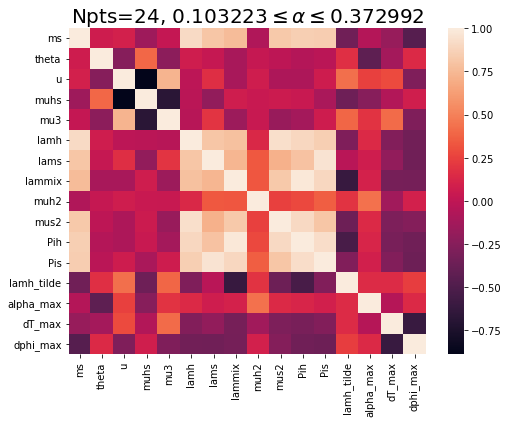

In [376]:

sns.heatmap(df[Columns].corr())
title="Npts="+str(len(df))+", "+str(round(df.alpha_max.min(),6))+"$\leq \\alpha \leq$"+str(round(df.alpha_max.max(),6))
plt.title(title,size=label_size)
plt.show()

In [377]:
stats.pearsonr(df['lammix'], df['alpha_max'])

(0.1034543522809558, 0.6304745089402808)

In [271]:
abs(df.corr()["alpha_max"])>.2



ms            False
theta         False
u             False
muhs          False
mu3           False
lamh          False
lams           True
lammix         True
muh2          False
mus2          False
Pih            True
Pis            True
lamh_tilde    False
th_bool       False
h_low_0        True
s_low_0       False
h_high_0      False
s_high_0      False
Tnuc_0         True
dT_0           True
alpha_0        True
vwf_0          True
xi_J_0         True
num_FOPT      False
alpha_max      True
dT_max         True
h_low_1        True
s_low_1       False
h_high_1      False
s_high_1      False
Tnuc_1        False
dT_1           True
alpha_1        True
vwf_1          True
xi_J_1         True
h_low_2        True
s_low_2       False
h_high_2       True
s_high_2      False
Tnuc_2         True
dT_2           True
alpha_2        True
vwf_2          True
xi_J_2         True
h_low_3       False
s_low_3       False
h_high_3      False
s_high_3      False
Tnuc_3        False
dT_3          False


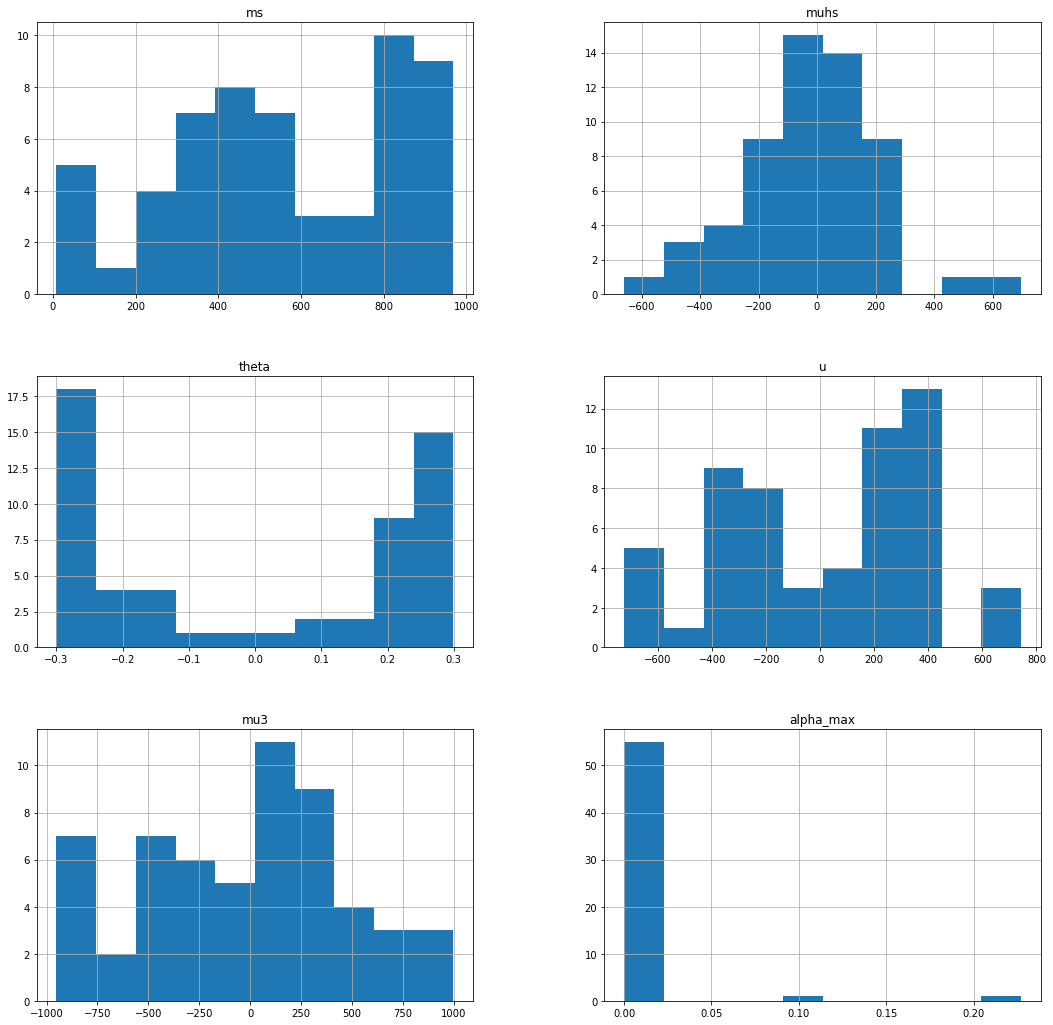

In [249]:
df[["ms","muhs","theta","u","mu3","alpha_max"]].hist(figsize=(18,18))
plt.show()

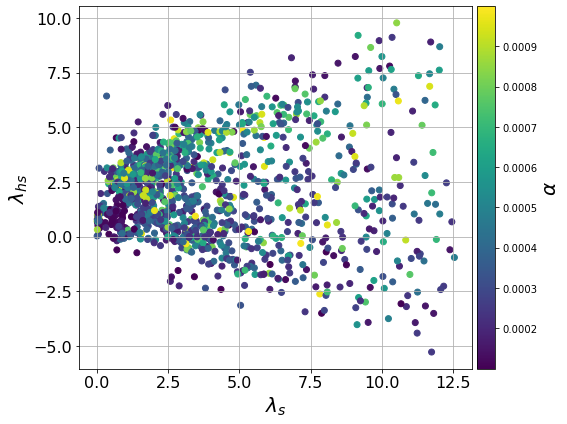

In [170]:

plt.scatter(df.lams,df.lammix,c=(df.alpha_max))
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\\alpha$", size=label_size, weight='bold')


plt.xlabel("$\\lambda_s$",size=label_size)
plt.ylabel("$\\lambda_{hs}$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=7)

#plt.legend(prop={'size': label_size})
#plt.title("CP violation",size=label_size)
plt.grid(True)
plt.tight_layout()
#plt.savefig('SCANS/bubble_PLOTS/bubble_vw_alpha_CP.pdf', dpi=300)
plt.show()

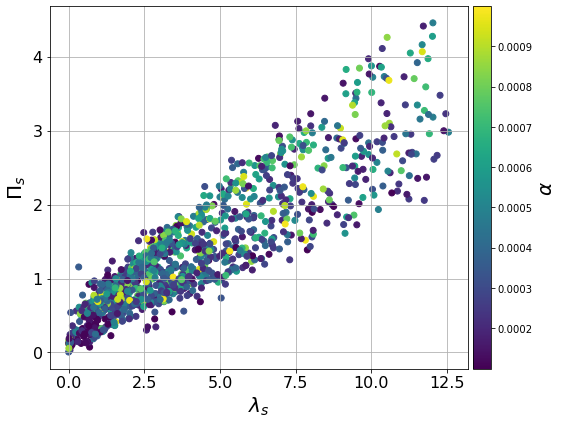

In [171]:

plt.scatter(df.lams,df.Pis,c=(df.alpha_max))
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\\alpha$", size=label_size, weight='bold')


plt.xlabel("$\\lambda_s$",size=label_size)
plt.ylabel("$\\Pi_s$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=7)

#plt.legend(prop={'size': label_size})
#plt.title("CP violation",size=label_size)
plt.grid(True)
plt.tight_layout()
#plt.savefig('SCANS/bubble_PLOTS/bubble_vw_alpha_CP.pdf', dpi=300)
plt.show()

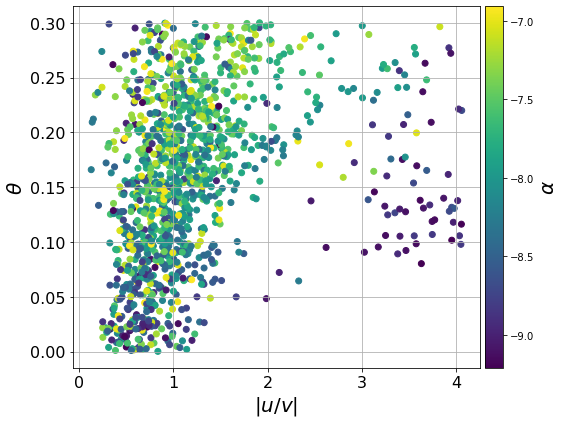

In [172]:
plt.scatter(abs(df.u/v),abs(df.theta),c=np.log(df.alpha_max))
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$\\alpha$", size=label_size, weight='bold')


plt.xlabel("$|u/v|$",size=label_size)
plt.ylabel("$\\theta$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=7)

#plt.legend(prop={'size': label_size})
#plt.title("CP violation",size=label_size)
plt.grid(True)
plt.tight_layout()
#plt.savefig('SCANS/bubble_PLOTS/bubble_vw_alpha_CP.pdf', dpi=300)
plt.show()

In [153]:
df=df.sort_values("alpha_max")
modi=-6
[ms_val,u_val,muhs_val,mu3_val]=df.iloc[modi].ms,df.iloc[modi].u,df.iloc[modi].muhs,df.iloc[modi].mu3

In [154]:
ms_range=np.logical_and(df.ms<ms_val*(1+np.sign(ms_val)*.1),df.ms>ms_val*(1-np.sign(ms_val)*.1))
#u_range=np.logical_and(df.u<u_val*(1+np.sign(u_val)*.5),df.u>u_val*(1-np.sign(u_val)*.5))
muhs_range=np.logical_and(df.muhs<muhs_val*(1+np.sign(muhs_val)*.1),df.muhs>muhs_val*(1-np.sign(muhs_val)*.1))
mu3_range=np.logical_and(df.mu3<mu3_val*(1+np.sign(mu3_val)*.9),df.mu3>mu3_val*(1-np.sign(mu3_val)*.9))

logical_1=np.logical_and(ms_range,muhs_range)
logical_2=np.logical_and(logical_1,mu3_range)


In [155]:
sum(ms_range),sum(muhs_range),sum(mu3_range)

(2064, 1101, 8735)

In [156]:
len(df[logical_2])

112

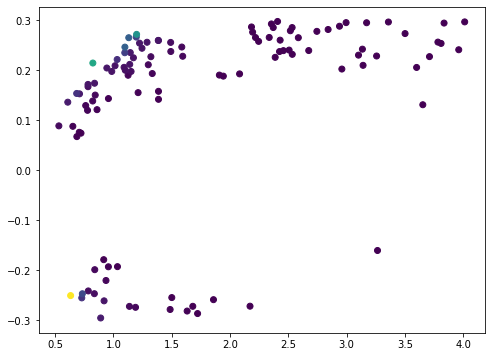

In [157]:
plt.scatter(df[logical_2].u/v,df[logical_2].theta,c=df[logical_2].alpha_max)

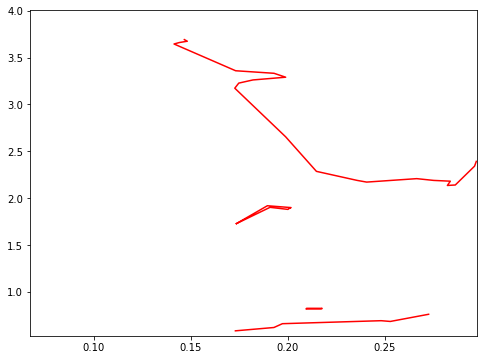

In [158]:
###Example code of how one can do contours easily


#plt.scatter(x,y,c=z )
plt.tricontour(abs(df[logical_2].theta),abs(df[logical_2].u/v),df[logical_2].alpha_max,levels=[1e-4,1e-1],colors="r")

plt.show()

In [96]:
df.corr()["alpha_max"]

ms            0.028168
theta        -0.011250
u            -0.001865
muhs         -0.010413
mu3           0.022937
lamh          0.088551
lams          0.148336
lammix        0.150694
muh2          0.130992
mus2          0.038895
Pih           0.209157
Pis           0.187732
lamh_tilde    0.002544
th_bool            NaN
h_low_0       0.715610
s_low_0       0.000398
h_high_0      0.038252
s_high_0      0.001810
Tnuc_0       -0.240126
dT_0          0.463510
alpha_0       0.882974
vwf_0         0.847464
xi_J_0        0.788936
num_FOPT     -0.194659
alpha_max     1.000000
dT_max        0.533691
h_low_1       0.886457
s_low_1      -0.031664
h_high_1      0.056583
s_high_1     -0.032038
Tnuc_1       -0.200723
dT_1          0.577689
alpha_1       0.991031
vwf_1         0.965341
xi_J_1        0.948914
h_low_2       0.764015
s_low_2       0.031050
h_high_2      0.304727
s_high_2     -0.023023
Tnuc_2       -0.305119
dT_2          0.191480
alpha_2       0.999840
vwf_2         0.638024
xi_J_2     

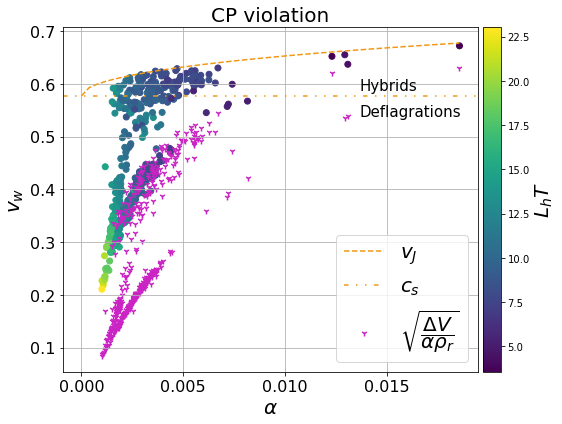

In [48]:
df=pd.read_csv("SCANS/BAU/sols_fullmodel_All.csv",index_col=[0])
df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.alpha_max>1e-3]

v_J=lambda alpha_p:((alpha_p*(2+3*alpha_p))**0.5+1)/(3**0.5*(1+alpha_p))
al_range=np.linspace(0,df.alpha_max.max())



thick_size=16
label_size=20
#plt.rcParams['text.usetex'] = True

plt.scatter(df.alpha_0,df.vw,c=df.Lh*df.Tnuc_0)
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$L_h T$", size=label_size, weight='bold')
#plt.plot(df.alpha_0,df.xi_J_0,c="#f09917",label="$v_J$",linestyle="--")
plt.plot(al_range,v_J(al_range),c="#f09917",label="$v_J$",linestyle="--")
df=df[df.vwf_0<=df.xi_J_0]
plt.scatter(df.alpha_0,df.vwf_0,c="#CA25C4",marker="1",label="$\\sqrt{\dfrac{\\Delta V}{\\alpha \\rho_r}}$")

plt.axhline(y=cs,linestyle=(0, (3, 5, 1, 5, 1, 5)),c="#f09917",label="$c_s$")
plt.figtext(.63, .78, "Hybrids", fontsize=15)
plt.figtext(.63, .72, "Deflagrations", fontsize=15)

plt.xlabel("$\\alpha$",size=label_size)
plt.ylabel("$v_w$",size=label_size)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.locator_params(axis="x", nbins=6)
plt.locator_params(axis="y", nbins=7)

plt.legend(prop={'size': label_size})
plt.title("CP violation",size=label_size)
plt.grid(True)

plt.tight_layout()
#plt.savefig('SCANS/bubble_PLOTS/bubble_vw_alpha_CP.pdf', dpi=300)
plt.show()

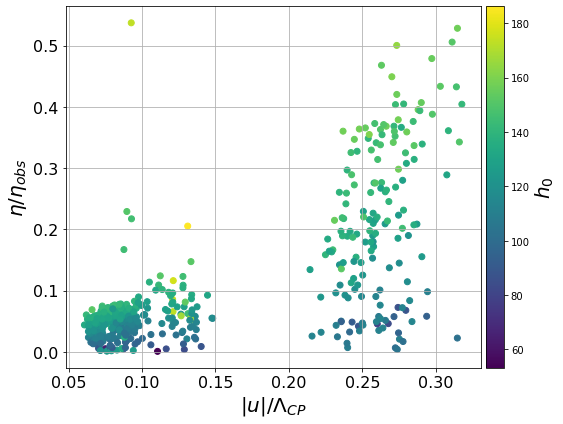

In [31]:
df=pd.read_csv("SCANS/BAU/sols_fullmodel_All.csv",index_col=[0])
df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]

plt.scatter(abs(df.u/df.Lam_CP),df.eta_BAU,c=df.h0)

plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$h_0$", size=label_size, weight='bold')
#plt.axhline(y=d_eEDM_bound,linestyle="--",c="k")
#plt.xscale("log")
plt.grid(True)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.xlabel("$|u|/\\Lambda_{CP}$",size=label_size)
plt.ylabel("$\\eta/\\eta_{obs}$",size=label_size)
#plt.figtext(.47, .41, "ACME", fontsize=15)
#plt.xlim(0.1,.9)
plt.tight_layout()
#plt.savefig('SCANS/BAU_plots/EDM_plot.pdf', dpi=300)
plt.show()

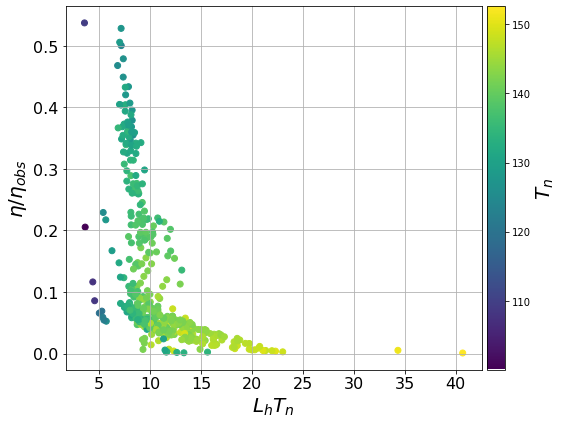

In [30]:
df=pd.read_csv("SCANS/BAU/sols_fullmodel_All.csv",index_col=[0])
df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]

plt.scatter(df.Lh*df.Tnuc_0,df.eta_BAU,c=df.Tnuc_0)

plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$T_{n}$", size=label_size, weight='bold')
#plt.axhline(y=d_eEDM_bound,linestyle="--",c="k")
#plt.xscale("log")
plt.grid(True)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.xlabel("$L_h T_n$",size=label_size)
plt.ylabel("$\\eta/\\eta_{obs}$",size=label_size)
#plt.figtext(.47, .41, "ACME", fontsize=15)
#plt.xlim(0.1,.9)
plt.tight_layout()
#plt.savefig('SCANS/BAU_plots/EDM_plot.pdf', dpi=300)
plt.show()

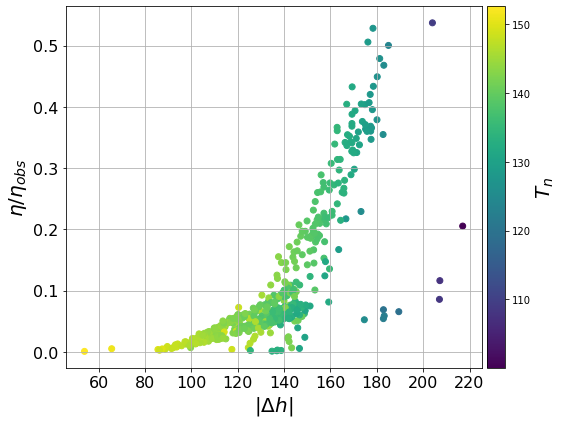

In [29]:
df=pd.read_csv("SCANS/BAU/sols_fullmodel_All.csv",index_col=[0])
df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]

plt.scatter(abs(df.h_low_0-df.h_high_0),df.eta_BAU,c=df.Tnuc_0)

plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$T_{n}$", size=label_size, weight='bold')
#plt.axhline(y=d_eEDM_bound,linestyle="--",c="k")
#plt.yscale("log")
plt.grid(True)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.xlabel("$|\\Delta h|$",size=label_size)
plt.ylabel("$\\eta/\\eta_{obs}$",size=label_size)
#plt.figtext(.47, .41, "ACME", fontsize=15)
#plt.xlim(0.1,.9)
plt.tight_layout()
#plt.savefig('SCANS/BAU_plots/EDM_plot.pdf', dpi=300)
plt.show()

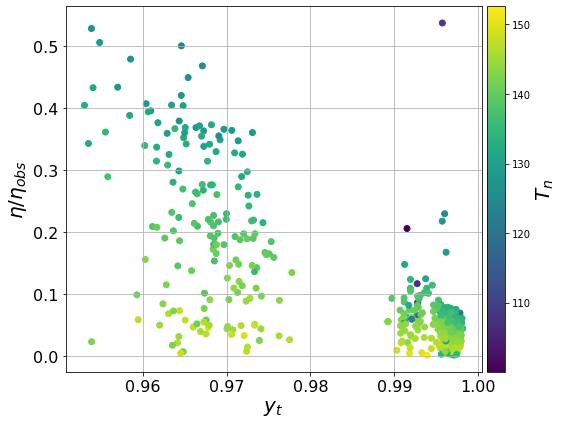

In [27]:
df=pd.read_csv("SCANS/BAU/sols_fullmodel_All.csv",index_col=[0])
df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]

plt.scatter(df.yt,df.eta_BAU,c=df.Tnuc_0)

plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$T_{n}$", size=label_size, weight='bold')
#plt.axhline(y=d_eEDM_bound,linestyle="--",c="k")
#plt.yscale("log")
plt.grid(True)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.xlabel("$y_t$",size=label_size)
plt.ylabel("$\\eta/\\eta_{obs}$",size=label_size)
#plt.figtext(.47, .41, "ACME", fontsize=15)
#plt.xlim(0.1,.9)
plt.tight_layout()
#plt.savefig('SCANS/BAU_plots/EDM_plot.pdf', dpi=300)
plt.show()

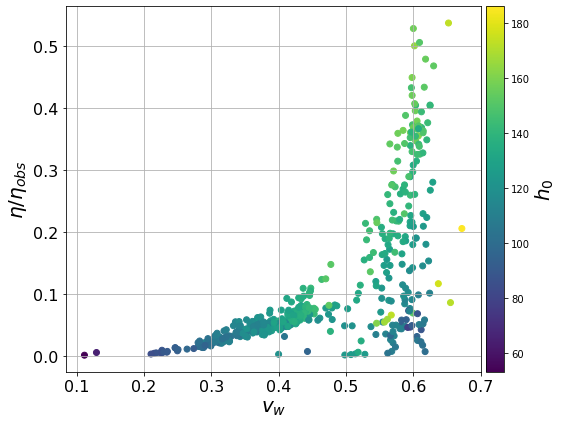

In [28]:
df=pd.read_csv("SCANS/BAU/sols_fullmodel_All.csv",index_col=[0])
df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]

plt.scatter(df.vw,df.eta_BAU,c=df.h0)
plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$h_0$", size=label_size, weight='bold')
#plt.axhline(y=d_eEDM_bound,linestyle="--",c="k")
#plt.xscale("log")
plt.grid(True)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.xlabel("$v_w$",size=label_size)
plt.ylabel("$\\eta/\\eta_{obs}$",size=label_size)
#plt.figtext(.47, .41, "ACME", fontsize=15)
#plt.xlim(0.1,.9)
plt.tight_layout()
plt.savefig('SCANS/BAU_plots/BAU_vw.pdf', dpi=300)
plt.show()

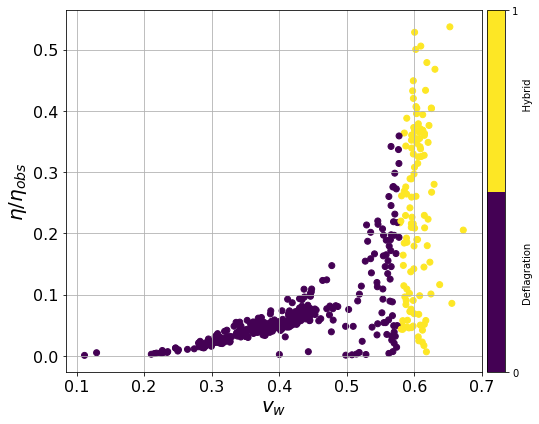

In [132]:
df=pd.read_csv("SCANS/BAU/sols_fullmodel_All.csv",index_col=[0])
df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]
df=df[df.Lam_CP>abs(df.u)]
df["Type_bool"]=list(df.Type=="Hybrid")

plt.scatter(df.vw,df.eta_BAU,c=df.Type_bool,cmap=plt.cm.get_cmap('viridis', 2))
plt.colorbar(ticks=range(0,2), label='Deflagration                                          Hybrid',pad=0.01)

#plt.colorbar(orientation="vertical",pad=0.01).set_label( label="$h_0$", size=label_size, weight='bold')
#plt.axhline(y=d_eEDM_bound,linestyle="--",c="k")
#plt.xscale("log")
plt.grid(True)
plt.xticks(fontsize=thick_size)
plt.yticks(fontsize=thick_size)
plt.xlabel("$v_w$",size=label_size)
plt.ylabel("$\\eta/\\eta_{obs}$",size=label_size)
#plt.figtext(.47, .41, "ACME", fontsize=15)
#plt.xlim(0.1,.9)
plt.tight_layout()
plt.savefig('SCANS/BAU_plots/BAU_vw_Type.pdf', dpi=300)
plt.show()




In [142]:
df=pd.read_csv("SCANS/BAU/sols_fullmodel_All.csv",index_col=[0])
df=df[df["vel_converged"]==True]
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]

corr_columns=['ms', 'theta', 'u', 'muhs', 'mu3', 'yt', 'lamh', 'lams', 'lammix',
              'muh2', 'mus2', 'Pih', 'Pis', 'lamh_tilde', 'Lam_CP', 
              'h_low_0', 's_low_0', 'h_high_0', 's_high_0',
              'Tnuc_0', 'dT_0', 'alpha_0', 'vwf_0', 'xi_J_0', 'alpha_max', 'dT_max', 
              'vw', 'Lh', 'h0', 'Ls', 'ds', 'shigh', 'slow', 'alpha_p', 'vm', 'vp', 'xi_s', 'Tp/TN', 'Tc',
              'LT', 'eta_BAU']
df_correlation=df[corr_columns].corr()
abs(df_correlation["eta_BAU"]).sort_values()

h_high_0      0.035692
Tc            0.110564
theta         0.140308
dT_0          0.252358
dT_max        0.252358
mus2          0.278928
shigh         0.302092
mu3           0.317551
s_high_0      0.325203
lamh_tilde    0.329104
Lam_CP        0.360257
muh2          0.388001
muhs          0.393209
ds            0.465346
Lh            0.480619
Ls            0.496662
lams          0.539121
Pis           0.584515
lammix        0.590074
LT            0.598392
alpha_p       0.602156
vp            0.603258
Tnuc_0        0.604129
Pih           0.606216
ms            0.631770
u             0.634970
alpha_0       0.637338
alpha_max     0.637338
slow          0.645264
s_low_0       0.648021
vm            0.658569
h0            0.660718
vw            0.683991
lamh          0.698203
xi_s          0.698559
xi_J_0        0.707971
yt            0.718443
Tp/TN         0.753149
h_low_0       0.786428
vwf_0         0.811049
eta_BAU       1.000000
Name: eta_BAU, dtype: float64

In [161]:
df0=pd.read_csv("SCANS/BAU/sols_fullmodel_All.csv",index_col=[0])
df1=pd.read_csv("SCANS/ALL_PLOTS/PLOTS_42/zzzfull_model_vw_solutions_new.csv",index_col=[0])
df=pd.concat([df0,df1])
df=df[df.Lam_CP>df.ms]
df=df[df.Lam_CP>v]
df=df[df.Lam_CP>abs(df.mu3)]
df=df[df.Lam_CP>abs(df.muhs)]

In [162]:

type_bool=[]
for modi in range(len(df)):
    if df.iloc[modi].vwf_0>df.iloc[modi].xi_J_0:
        type_bool.append(2)
    elif df.iloc[modi].xi_J_0>df.iloc[modi].vwf_0>cs:
        type_bool.append(1)
    else:
        type_bool.append(0)
df["Type_bool_formula"]=type_bool  
df["Type_bool"]=list(df['Type'].replace(['Deflagration', 'Hybrid',"Detonation"],[0,1,2], inplace=False))




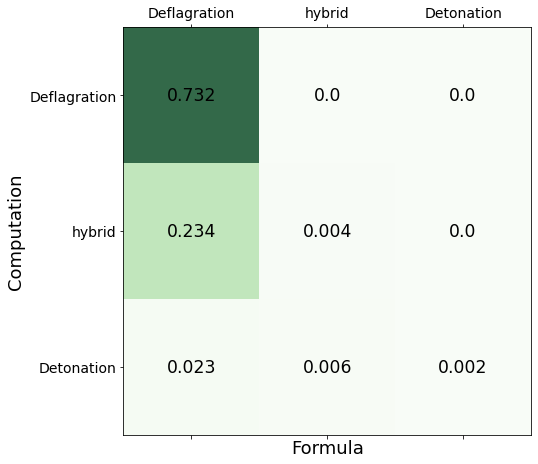

In [163]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=df.Type_bool, y_pred=df.Type_bool_formula,normalize="all")
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Greens, alpha=.8)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=np.round(conf_matrix[i, j],3), va='center', ha='center', size='xx-large')
 
plt.xlabel('Formula', fontsize=18)
plt.ylabel('Computation', fontsize=18)
#plt.title('Confusion Matrix', fontsize=18)
plt.xticks(ticks=[0,1,2],labels=["Deflagration","hybrid","Detonation"],fontsize=14)
plt.yticks(ticks=[0,1,2],labels=["Deflagration","hybrid","Detonation"],fontsize=14)
plt.tight_layout()
#plt.savefig('SCANS/bubble_PLOTS/confusion.pdf', dpi=300)
plt.show()

In [164]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(y_true=df.Type_bool, y_pred=df.Type_bool_formula,average="weighted")

(0.6676578123937148, 0.7377049180327869, 0.6342651461391625, None)